Some typical NumPy 'random' functions:

In [2]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]]
[ 1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769]
[76 58 22 89 49 91 59 42 92 60]
[3 7 4]
[-0.46572975 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869
 -0.29169375 -0.60170661  1.85227818 -0.01349722]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [11]:
# Write your code for AIM #1 here

import pandas as pd
import numpy as np
import time

# Generate a dataset of 1 million random data items between 1 and 100 using Pandas
start_time_pandas = time.time()  # Start timing
pandas_data = pd.DataFrame(np.random.randint(1, 101, size=1000000), columns=['RandomNumbers'])
end_time_pandas = time.time()  # End timing

# Generate a dataset of 1 million random data items between 1 and 100 using NumPy
start_time_numpy = time.time()  # Start timing
numpy_data = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()  # End timing

# Calculate the time taken for both operations
time_taken_pandas = end_time_pandas - start_time_pandas
time_taken_numpy = end_time_numpy - start_time_numpy

# Results
print(f"Time taken to generate dataset using Pandas: {time_taken_pandas} seconds")
print(f"Time taken to generate dataset using NumPy: {time_taken_numpy:} seconds")

# Print the faster one
if time_taken_pandas < time_taken_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Time taken to generate dataset using Pandas: 0.007682323455810547 seconds
Time taken to generate dataset using NumPy: 0.008238554000854492 seconds
Pandas is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

1.mean 2.correlation 3.standard deviation

In [63]:
# Write your code for AIM #2 here
import pandas as pd
import numpy as np
import time

# Using padas load the dataset
pd_data = pd.read_csv('sleep_health.csv')

# Caculate mean (pandas)
start_time_pandas = time.time() #Start
mean_Sleep_Duration = pd_data['Sleep Duration'].mean()
mean_Systolic_Blood_Pressure = pd_data['Systolic blood pressure'].mean()
mean_Diastolic_Blood_Pressure = pd_data['Diastolic blood pressure'].mean()
mean_Herat_Rate = pd_data['Heart Rate'].mean()
mean_Daily_Steps = pd_data['Daily Steps'].mean()
end_time_pandas = time.time() # End

# Loading the CSV file as an array in NumPy
np_data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

# Calculate means using NumPy
# Create separate arrays for the individual columns that you want to operate on
# For example, to create a separate array for 'Age' column
# age = np_data['Age'].astype(int)
start_time_numpy = time.time() # Start
mean_sleep_duration = np.mean(np_data['Sleep_Duration'].astype(float))
mean_systolic_bp = np.mean(np_data['Systolic_blood_pressure'].astype(float))
mean_diastolic_bp = np.mean(np_data['Diastolic_blood_pressure'].astype(float))
mean_heart_rate = np.mean(np_data['Heart_Rate'].astype(float))
mean_daily_steps = np.mean(np_data['Daily_Steps'].astype(float))
end_time_numpy = time.time() #End

# Calculate the time taken for both operations
time_taken_pandas = end_time_pandas - start_time_pandas
time_taken_numpy = end_time_numpy - start_time_numpy

# Results
print(f"Time taken to caculate mean using Pandas: {time_taken_pandas} seconds")
print(f"Time taken to caculate mean using NumPy: {time_taken_numpy:} seconds")

# Print the faster one
if time_taken_pandas < time_taken_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")





numeric_cols = pd_data.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_pd = numeric_cols.corr()

# Extract specific correlations
correlation_sleep_age_pd = correlation_pd.loc['Sleep Duration', 'Age']
correlation_sleep_heart_rate_pd = correlation_pd.loc['Sleep Duration', 'Heart Rate']
correlation_sleep_daily_steps_pd = correlation_pd.loc['Sleep Duration', 'Daily Steps']

# Print the correlations calculated using pandas
print("\nPandas Correlations:")
print("Correlation between Sleep Duration and Age:", correlation_sleep_age_pd)
print("Correlation between Sleep Duration and Heart Rate:", correlation_sleep_heart_rate_pd)
print("Correlation between Sleep Duration and Daily Steps:", correlation_sleep_daily_steps_pd)

np_data_numeric = numeric_cols[['Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps']].to_numpy()

# Calculate the correlation matrix using NumPy
correlation_matrix_np = np.corrcoef(np_data_numeric.T)

# The correlation coefficients are located in the off-diagonal elements
correlation_sleep_age_np = correlation_matrix_np[0, 1]  # Sleep Duration and Age
correlation_sleep_heart_rate_np = correlation_matrix_np[0, 2]  # Sleep Duration and Heart Rate
correlation_sleep_daily_steps_np = correlation_matrix_np[0, 3]  # Sleep Duration and Daily Steps

# Print the correlations calculated using NumPy
print("\nNumPy Correlations:")
print("Correlation between Sleep Duration and Age:", correlation_sleep_age_np)
print("Correlation between Sleep Duration and Heart Rate:", correlation_sleep_heart_rate_np)
print("Correlation between Sleep Duration and Daily Steps:", correlation_sleep_daily_steps_np)





# Use np-std() to calculate Standard deviation
start_time_pandas3 = time.time()
std_sleep_duration_pd = pd_data['Sleep Duration'].std()
end_time_pandas3 = time.time()

start_time_numpy3 = time.time()
std_sleep_duration_np = np.std(np_data['Sleep_Duration'].astype(float), ddof=1)
end_time_numpy3 = time.time()

# Calculate the time taken for both operations
time_taken_pandas3 = end_time_pandas3 - start_time_pandas3
time_taken_numpy3 = end_time_numpy3 - start_time_numpy3

# Results
print(f"Time taken to caculate mean using Pandas: {time_taken_pandas3} seconds")
print(f"Time taken to caculate mean using NumPy: {time_taken_numpy3:} seconds")

# Print the faster one
if time_taken_pandas3 < time_taken_numpy3:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Time taken to caculate mean using Pandas: 0.0010187625885009766 seconds
Time taken to caculate mean using NumPy: 0.0 seconds
NumPy is faster.

Pandas Correlations:
Correlation between Sleep Duration and Age: 0.3447093581647443
Correlation between Sleep Duration and Heart Rate: -0.516454888517144
Correlation between Sleep Duration and Daily Steps: -0.039532537675731685

NumPy Correlations:
Correlation between Sleep Duration and Age: 0.34470935816474385
Correlation between Sleep Duration and Heart Rate: -0.5164548885171427
Correlation between Sleep Duration and Daily Steps: -0.03953253767573259
Time taken to caculate mean using Pandas: 0.0 seconds
Time taken to caculate mean using NumPy: 0.0 seconds
NumPy is faster.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

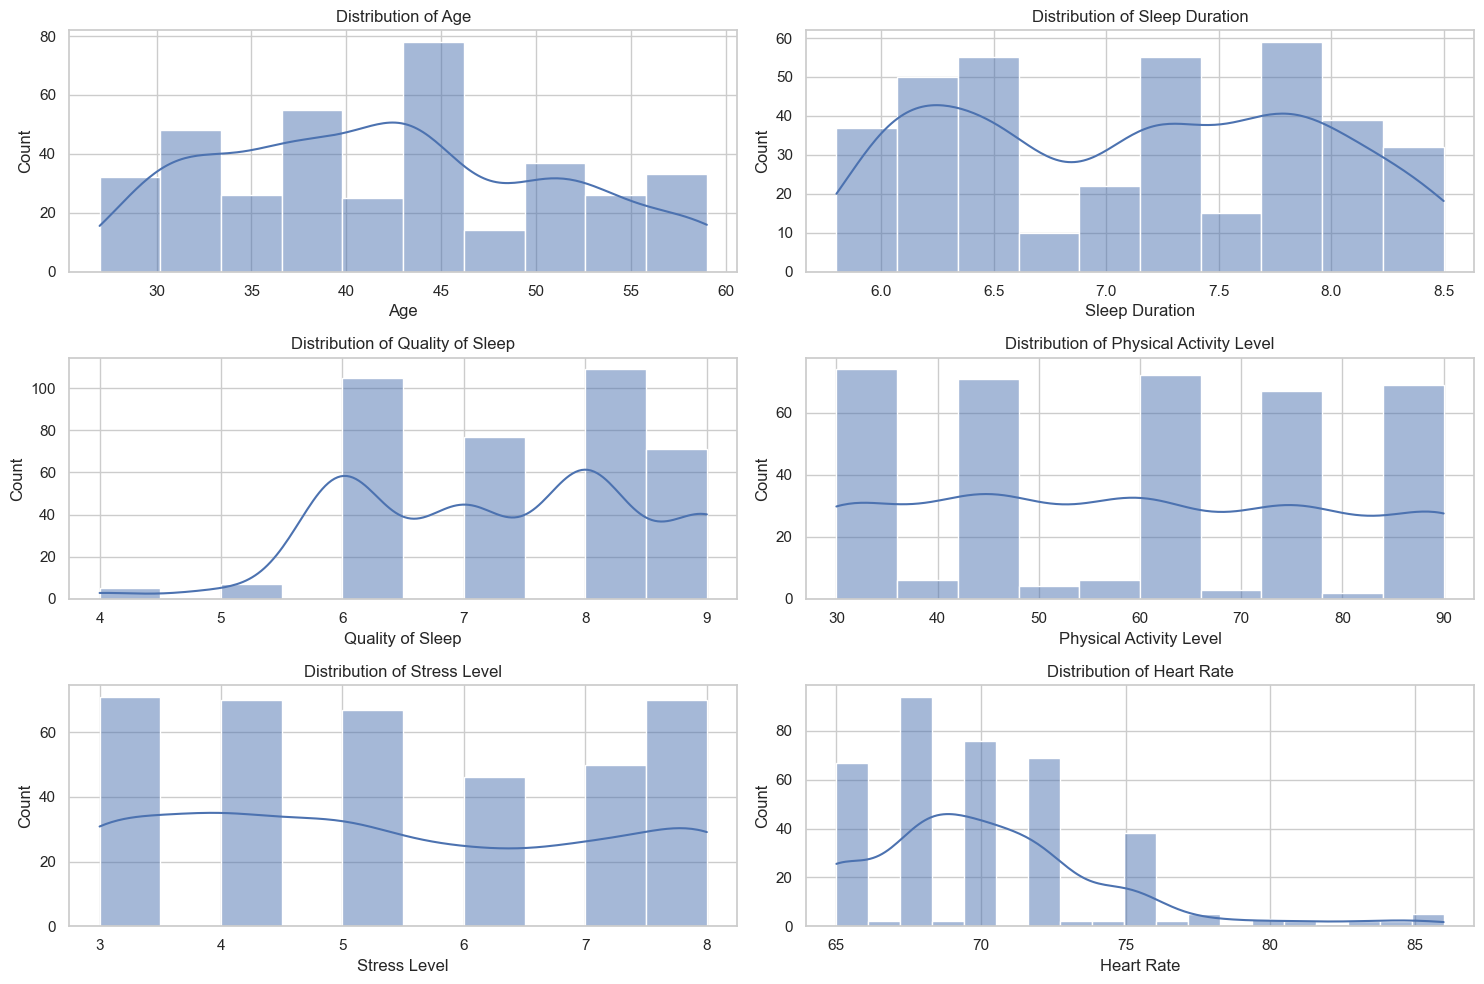

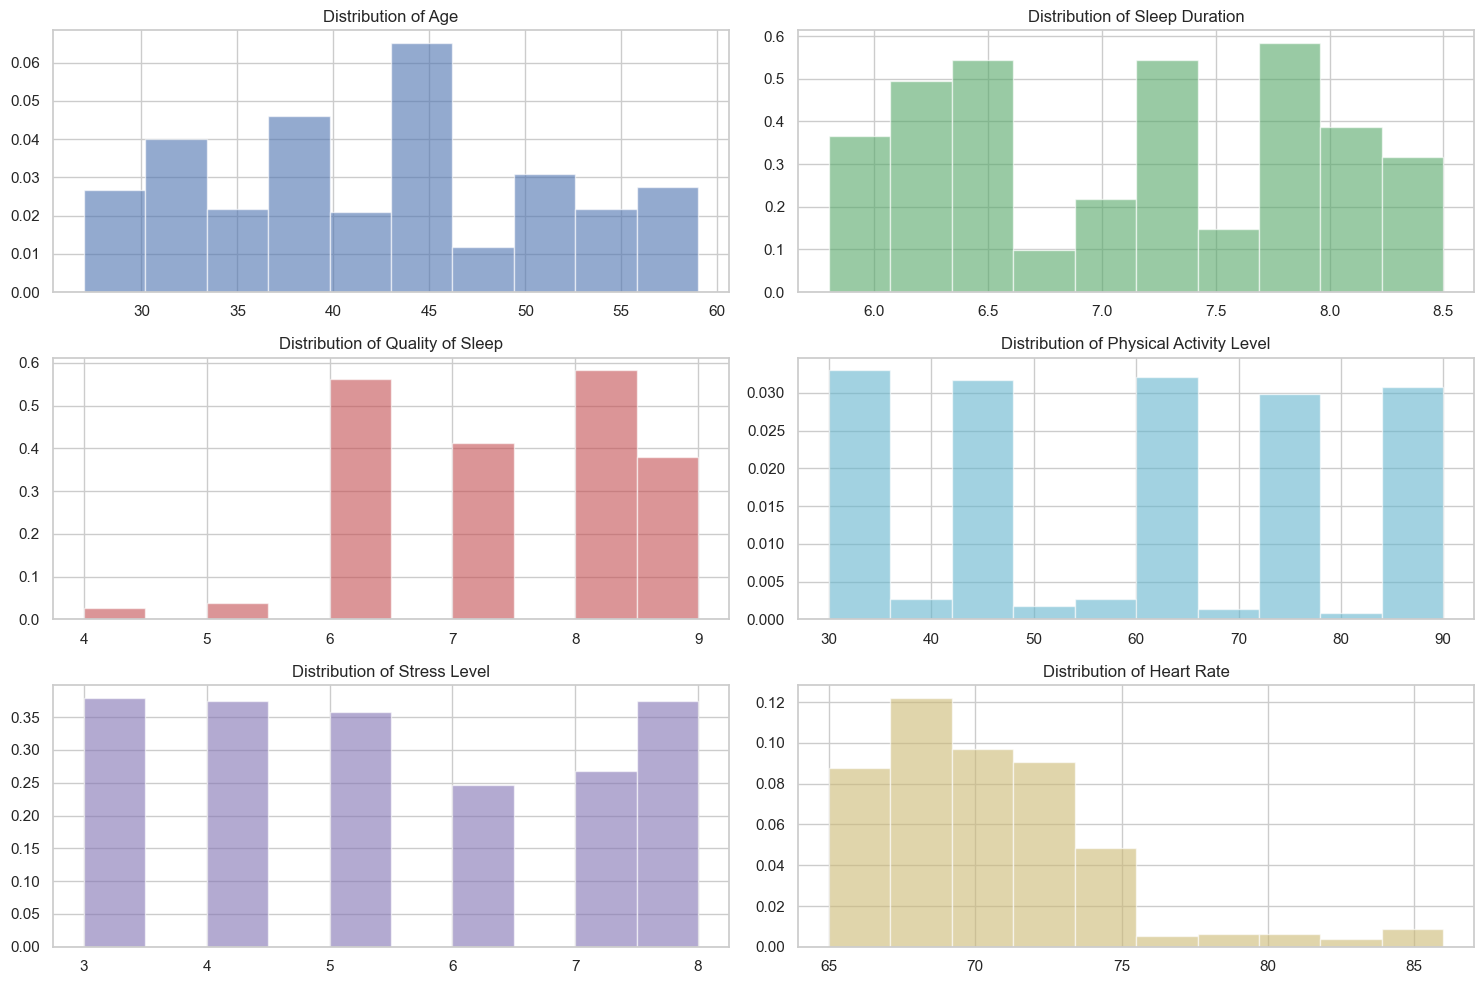

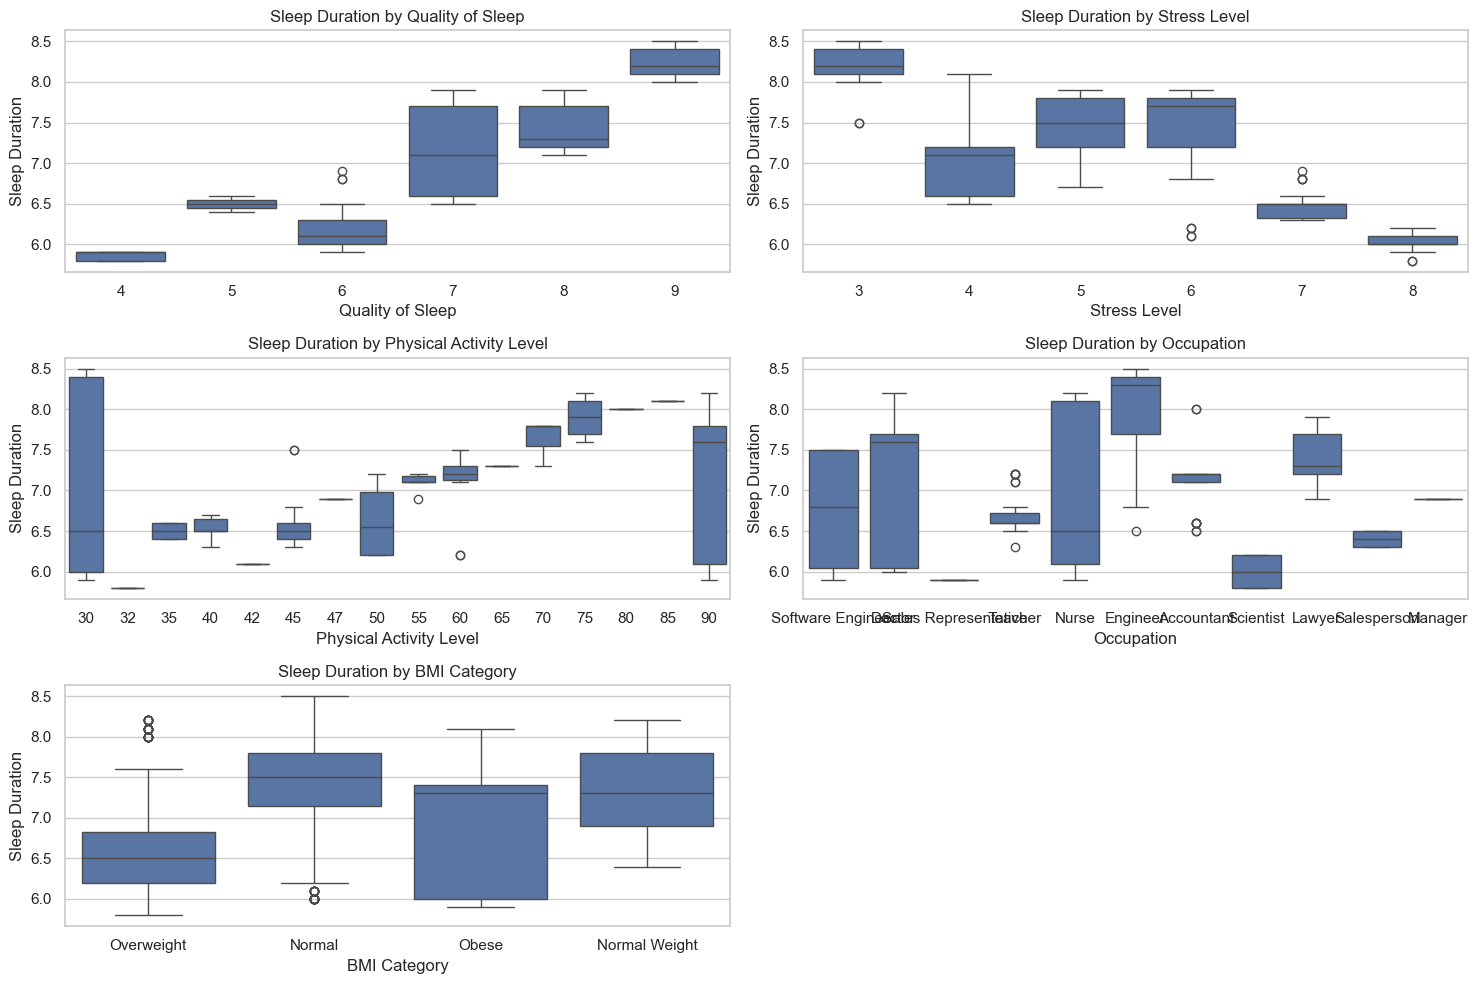

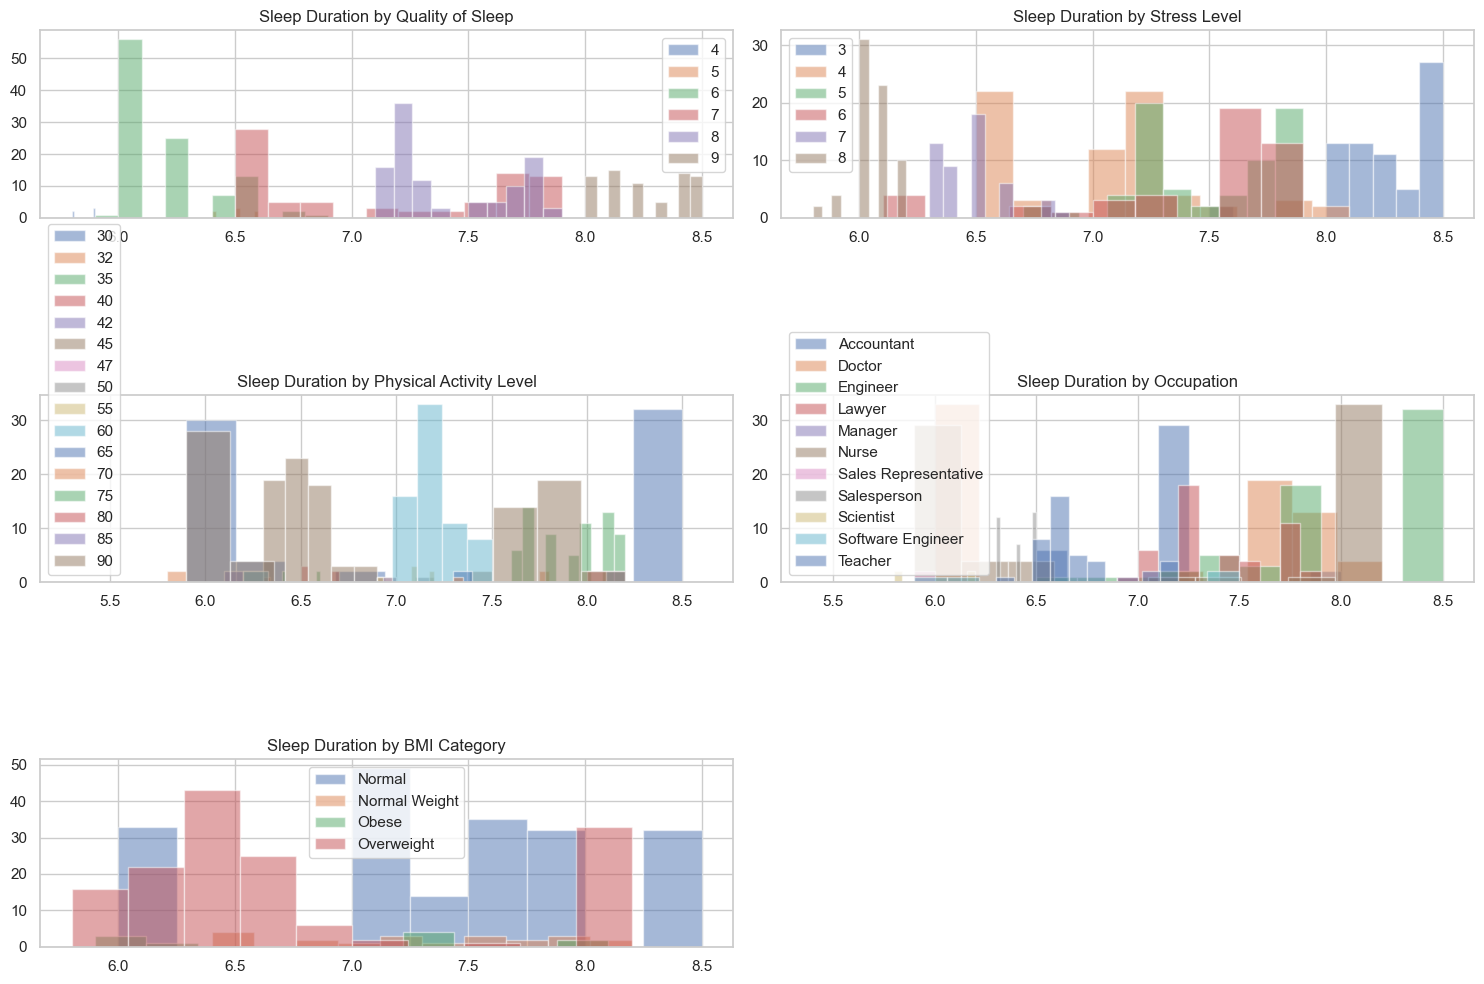

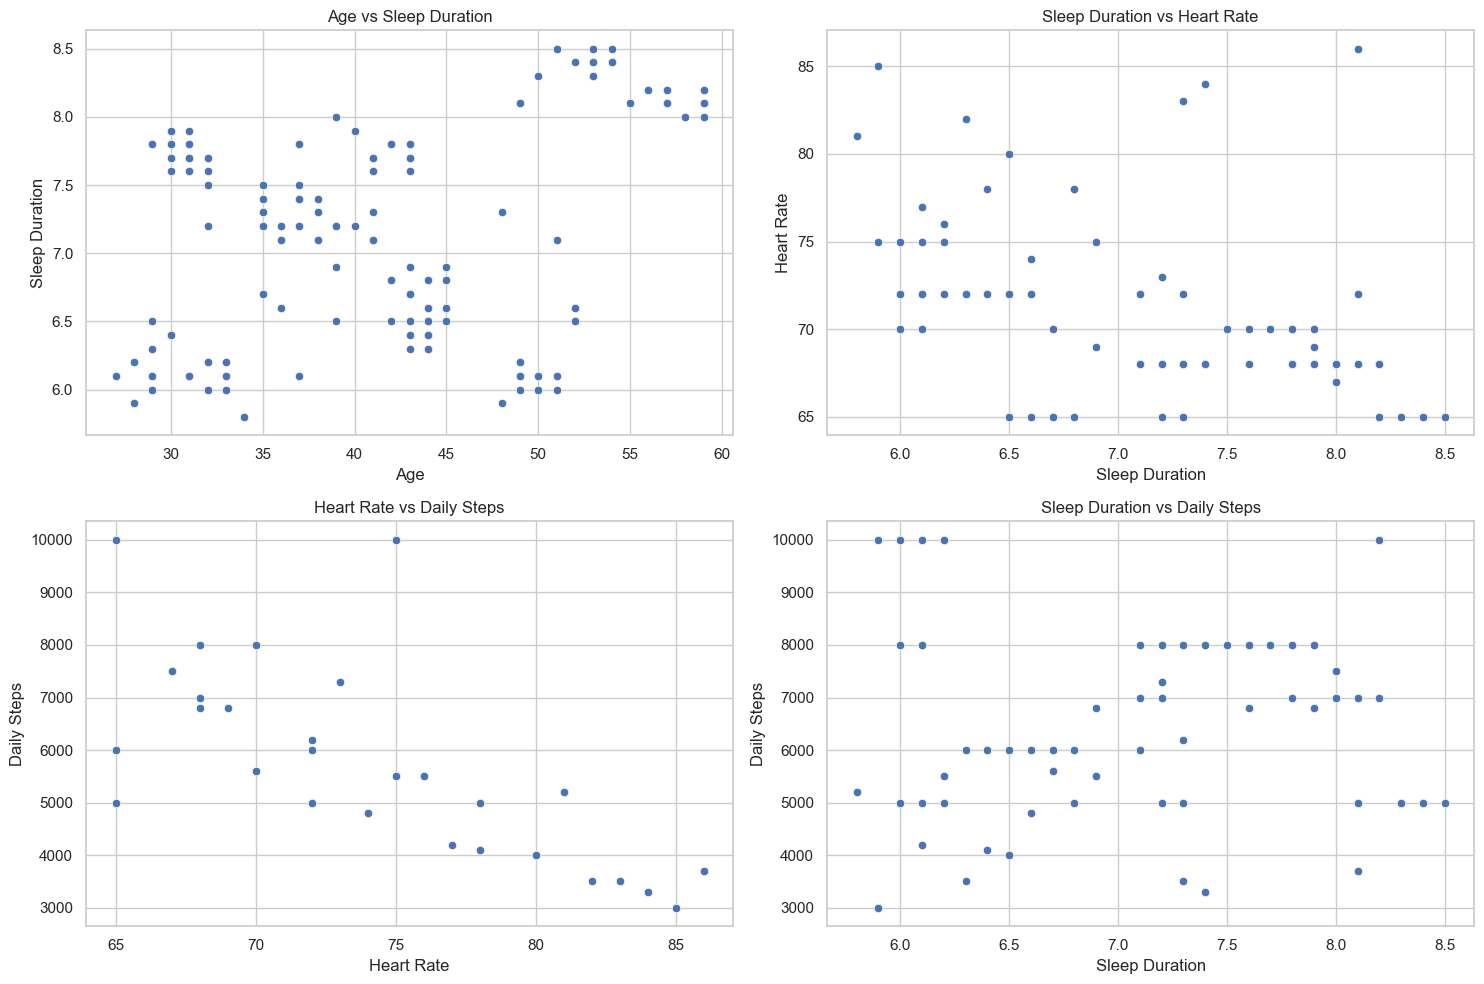

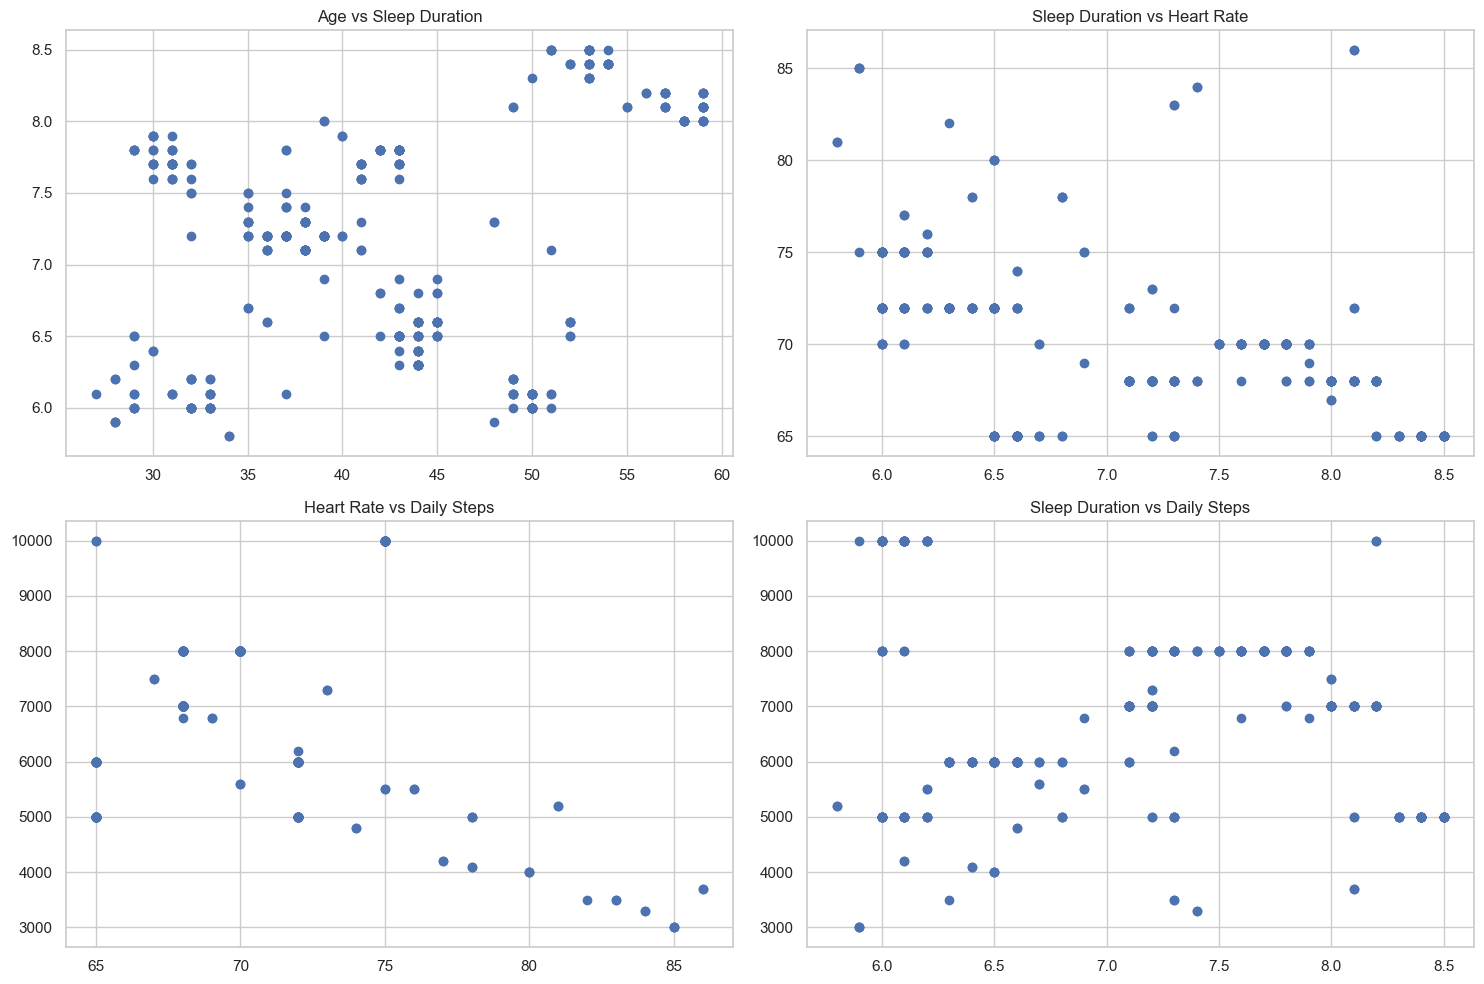

Time taken for plotting using pandas: 1.1019 seconds
Time taken for plotting using NumPy: 1.3020 seconds
Time taken for category plotting using pandas: 1.0167 seconds
Time taken for category plotting using NumPy: 1.5899 seconds
Time taken for relationship plotting using pandas: 0.9400 seconds
Time taken for relationship plotting using NumPy: 0.7341 seconds


In [67]:
# Write your code for AIM #3 here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load the data into a DataFrame
pd_data = pd.read_csv('sleep_health.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# Using only pandas (and matplotlib/seaborn) plot the distributions
def plot_distributions(df):
    plt.figure(figsize=(15, 10))

    # Age
    plt.subplot(3, 2, 1)
    sns.histplot(df['Age'], kde=True)
    plt.title('Distribution of Age')

    # Sleep Duration
    plt.subplot(3, 2, 2)
    sns.histplot(df['Sleep Duration'], kde=True)
    plt.title('Distribution of Sleep Duration')

    # Quality of Sleep
    plt.subplot(3, 2, 3)
    sns.histplot(df['Quality of Sleep'], kde=True)
    plt.title('Distribution of Quality of Sleep')

    # Physical Activity Level
    plt.subplot(3, 2, 4)
    sns.histplot(df['Physical Activity Level'], kde=True)
    plt.title('Distribution of Physical Activity Level')

    # Stress Level
    plt.subplot(3, 2, 5)
    sns.histplot(df['Stress Level'], kde=True)
    plt.title('Distribution of Stress Level')

    # Heart Rate
    plt.subplot(3, 2, 6)
    sns.histplot(df['Heart Rate'], kde=True)
    plt.title('Distribution of Heart Rate')

    plt.tight_layout()
    plt.show()

# Timing the pandas plotting
start_time_pd = time.time()
plot_distributions(pd_data)
end_time_pd = time.time()
pandas_plot_time = end_time_pd - start_time_pd

# Using only NumPy, plot the distributions
def plot_distributions_numpy(data):
    plt.figure(figsize=(15, 10))
    
    # Convert relevant columns to NumPy array
    age = data['Age'].to_numpy()
    sleep_duration = data['Sleep Duration'].to_numpy()
    quality_of_sleep = data['Quality of Sleep'].to_numpy()
    physical_activity_level = data['Physical Activity Level'].to_numpy()
    stress_level = data['Stress Level'].to_numpy()
    heart_rate = data['Heart Rate'].to_numpy()

    # Age
    plt.subplot(3, 2, 1)
    plt.hist(age, bins=10, alpha=0.6, color='b', density=True)
    plt.title('Distribution of Age')

    # Sleep Duration
    plt.subplot(3, 2, 2)
    plt.hist(sleep_duration, bins=10, alpha=0.6, color='g', density=True)
    plt.title('Distribution of Sleep Duration')

    # Quality of Sleep
    plt.subplot(3, 2, 3)
    plt.hist(quality_of_sleep, bins=10, alpha=0.6, color='r', density=True)
    plt.title('Distribution of Quality of Sleep')

    # Physical Activity Level
    plt.subplot(3, 2, 4)
    plt.hist(physical_activity_level, bins=10, alpha=0.6, color='c', density=True)
    plt.title('Distribution of Physical Activity Level')

    # Stress Level
    plt.subplot(3, 2, 5)
    plt.hist(stress_level, bins=10, alpha=0.6, color='m', density=True)
    plt.title('Distribution of Stress Level')

    # Heart Rate
    plt.subplot(3, 2, 6)
    plt.hist(heart_rate, bins=10, alpha=0.6, color='y', density=True)
    plt.title('Distribution of Heart Rate')

    plt.tight_layout()
    plt.show()

# Timing the NumPy plotting
start_time_np = time.time()
plot_distributions_numpy(pd_data)
end_time_np = time.time()
numpy_plot_time = end_time_np - start_time_np

# Using only pandas, plot distributions based on categories
def plot_distributions_by_category(df):
    plt.figure(figsize=(15, 10))

    # Sleep Duration based on Quality of Sleep
    plt.subplot(3, 2, 1)
    sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
    plt.title('Sleep Duration by Quality of Sleep')

    # Sleep Duration based on Stress Level
    plt.subplot(3, 2, 2)
    sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
    plt.title('Sleep Duration by Stress Level')

    # Sleep Duration based on Physical Activity Level
    plt.subplot(3, 2, 3)
    sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
    plt.title('Sleep Duration by Physical Activity Level')

    # Sleep Duration based on Occupation
    plt.subplot(3, 2, 4)
    sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
    plt.title('Sleep Duration by Occupation')

    # Sleep Duration based on BMI Category
    plt.subplot(3, 2, 5)
    sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
    plt.title('Sleep Duration by BMI Category')

    plt.tight_layout()
    plt.show()

# Timing the pandas category plotting
start_time_pd_cat = time.time()
plot_distributions_by_category(pd_data)
end_time_pd_cat = time.time()
pandas_category_plot_time = end_time_pd_cat - start_time_pd_cat

# Using only NumPy, do the same as Step 3
def plot_distributions_by_category_numpy(data):
    plt.figure(figsize=(15, 10))

    # Sleep Duration based on Quality of Sleep
    plt.subplot(3, 2, 1)
    for quality in np.unique(data['Quality of Sleep']):
        subset = data[data['Quality of Sleep'] == quality]['Sleep Duration']
        plt.hist(subset, alpha=0.5, label=str(quality), bins=10)
    plt.title('Sleep Duration by Quality of Sleep')
    plt.legend()

    # Sleep Duration based on Stress Level
    plt.subplot(3, 2, 2)
    for stress in np.unique(data['Stress Level']):
        subset = data[data['Stress Level'] == stress]['Sleep Duration']
        plt.hist(subset, alpha=0.5, label=str(stress), bins=10)
    plt.title('Sleep Duration by Stress Level')
    plt.legend()

    # Sleep Duration based on Physical Activity Level
    plt.subplot(3, 2, 3)
    for activity in np.unique(data['Physical Activity Level']):
        subset = data[data['Physical Activity Level'] == activity]['Sleep Duration']
        plt.hist(subset, alpha=0.5, label=str(activity), bins=10)
    plt.title('Sleep Duration by Physical Activity Level')
    plt.legend()

    # Sleep Duration based on Occupation
    plt.subplot(3, 2, 4)
    for occupation in np.unique(data['Occupation']):
        subset = data[data['Occupation'] == occupation]['Sleep Duration']
        plt.hist(subset, alpha=0.5, label=str(occupation), bins=10)
    plt.title('Sleep Duration by Occupation')
    plt.legend()

    # Sleep Duration based on BMI Category
    plt.subplot(3, 2, 5)
    for bmi in np.unique(data['BMI Category']):
        subset = data[data['BMI Category'] == bmi]['Sleep Duration']
        plt.hist(subset, alpha=0.5, label=str(bmi), bins=10)
    plt.title('Sleep Duration by BMI Category')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Timing the NumPy category plotting
start_time_np_cat = time.time()
plot_distributions_by_category_numpy(pd_data)
end_time_np_cat = time.time()
numpy_category_plot_time = end_time_np_cat - start_time_np_cat

# Using only pandas, plot relationships between variables
def plot_relationships(df):
    plt.figure(figsize=(15, 10))

    # Age and Sleep Duration
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Age', y='Sleep Duration', data=df)
    plt.title('Age vs Sleep Duration')

    # Sleep Duration and Heart Rate
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
    plt.title('Sleep Duration vs Heart Rate')

    # Heart Rate and Daily Steps
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
    plt.title('Heart Rate vs Daily Steps')

    # Sleep Duration and Daily Steps
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
    plt.title('Sleep Duration vs Daily Steps')

    plt.tight_layout()
    plt.show()

# Timing the pandas relationships plotting
start_time_pd_rel = time.time()
plot_relationships(pd_data)
end_time_pd_rel = time.time()
pandas_relationship_plot_time = end_time_pd_rel - start_time_pd_rel

# Using only NumPy, do the same as Step 5
def plot_relationships_numpy(data):
    plt.figure(figsize=(15, 10))

    # Age and Sleep Duration
    plt.subplot(2, 2, 1)
    plt.scatter(data['Age'], data['Sleep Duration'])
    plt.title('Age vs Sleep Duration')

    # Sleep Duration and Heart Rate
    plt.subplot(2, 2, 2)
    plt.scatter(data['Sleep Duration'], data['Heart Rate'])
    plt.title('Sleep Duration vs Heart Rate')

    # Heart Rate and Daily Steps
    plt.subplot(2, 2, 3)
    plt.scatter(data['Heart Rate'], data['Daily Steps'])
    plt.title('Heart Rate vs Daily Steps')

    # Sleep Duration and Daily Steps
    plt.subplot(2, 2, 4)
    plt.scatter(data['Sleep Duration'], data['Daily Steps'])
    plt.title('Sleep Duration vs Daily Steps')

    plt.tight_layout()
    plt.show()

# Timing the NumPy relationships plotting
start_time_np_rel = time.time()
plot_relationships_numpy(pd_data)
end_time_np_rel = time.time()
numpy_relationship_plot_time = end_time_np_rel - start_time_np_rel

# Print the timing results
print(f"Time taken for plotting using pandas: {pandas_plot_time:.4f} seconds")
print(f"Time taken for plotting using NumPy: {numpy_plot_time:.4f} seconds")
print(f"Time taken for category plotting using pandas: {pandas_category_plot_time:.4f} seconds")
print(f"Time taken for category plotting using NumPy: {numpy_category_plot_time:.4f} seconds")
print(f"Time taken for relationship plotting using pandas: {pandas_relationship_plot_time:.4f} seconds")
print(f"Time taken for relationship plotting using NumPy: {numpy_relationship_plot_time:.4f} seconds")



AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



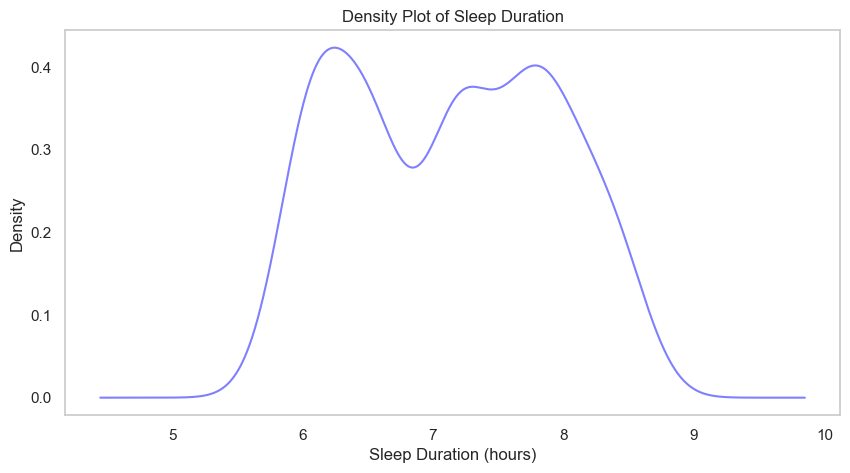

<Figure size 1500x1000 with 0 Axes>

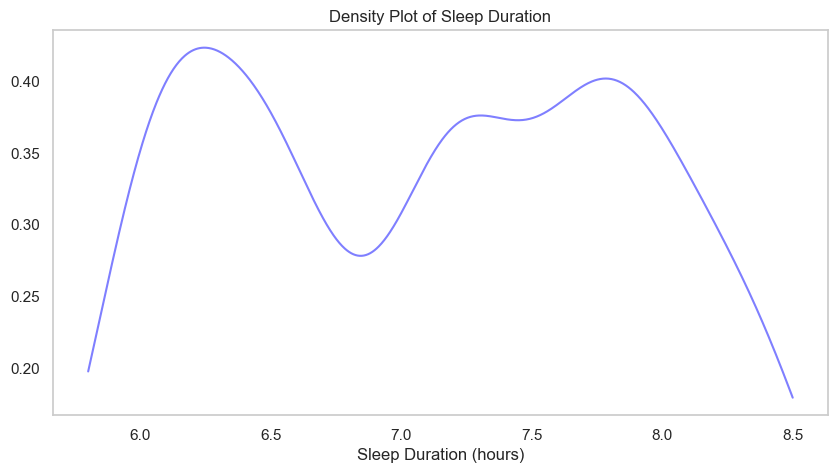

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load the data into a DataFrame
pd_data = pd.read_csv('sleep_health.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# Using only pandas (and matplotlib/seaborn) plot the distributions
def plot_distributions(df):
    plt.figure(figsize=(15, 10))

plt.figure(figsize=(10, 5))
pd_data['Sleep Duration'].plot(kind='density', color='blue', alpha=0.5)
plt.title('Density Plot of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.grid()
plt.show()


# Timing the pandas plotting
start_time_pd = time.time()
plot_distributions(pd_data)
end_time_pd = time.time()
pandas_plot_time = end_time_pd - start_time_pd

# Using only NumPy, plot the distributions
def plot_distributions_numpy(data):
    plt.figure(figsize=(15, 10))
    
    # Convert relevant columns to NumPy array
    sleep_duration = data['Sleep Duration'].to_numpy()

# Plotting the density
plt.figure(figsize=(10, 5))
plt.plot(x, density, color='blue', alpha=0.5)
plt.title('Density Plot of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.grid()
plt.show()



